# Binomial Logistic Regression

The goal of binomial logistic regression is to predict the output $ \hat{y} \in {1,0}$  from given input $ x \in {\rm I\!R}^{n} $.

That is a two class classification problem of features $ x \in {\rm I\!R}^{n} $.

We cannot use Linear Regression for the classification problem. 

The prediction function of Linear Regression can be $ \hat{y} > 1 or \hat{y} < 0 $

But for the binomial classification problem we need a prediction function, which result 1 or 0.

That is,

$
z = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} .... w_{n}x_{n} 
$

$
\hat{y} = f(z)
$
where $ f(z) \in {1,0}$

This can be formulated as, the prediction function, $ \hat{y} $ always results 
a probability, $  1 \le  \hat{y} \le  0 $ for given features belong to one of the class.

The prediction function, $ \hat{y} $ often use for this problem is `sigmoid` function (a special case of `logistic` function):

$
f(z) = \frac{1}{1 + e^{-z}}
$, which has the property $  1 \le  f(z) \le  0 $

So that the prediction function, $ \hat{y} $ becomes:

$
\hat{y} = \frac{1}{1 + e^{-W^Tx}}
$


## Cost Function

We cannot use Mean Square Error (MSE) as the cost function for logistic regression.

That is;

$
J(w) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}-y^{(i)})^{2}
$

$
J(w) = \frac{1}{m} \sum_{i=1}^{m} ( \frac{1}{1 + e^{-W^Tx^{(i)}}} -y^{(i)})^{2}
$

$J(w)$ is a non-convex function, which cannot be used in gradient descent as it leads to many local minima.


Cost function $J(w)$ for logistic regression should be;
- close to 0, when $\hat{y}$ close to $y$
- large value, when $\hat{y}$ far from $y$

This can be achived with the following function;

$
cost(\hat{y},y) =
\begin{cases}
-log(\hat{y}^{(i)}),  & \text{if $y^{(i)}$ = 1} \\[2ex]
-log(1 - \hat{y}^{(i)}), & \text{if $y^{(i)}$ = 0}
\end{cases}
$

It can be simplified as;

$
cost(\hat{y},y) = -y^{(i)}log(\hat{y}^{(i)}) - (1 - y^{(i)})log(1 - \hat{y}^{(i)})
$

which becomes the cost function;

$
J(w) = -\frac{1}{m} \sum_{i=1}^{m} (y^{(i)}log(\hat{y}^{(i)}) + (1 - y^{(i)})log(1 - \hat{y}^{(i)}))
$

## Probabilistic Interpretation of Cost funtion

$
p(y^{(i)} = 1 | x^{(i)};w) = \hat{y}^{(i)}
$

$
p(y^{(i)} = 0 | x^{(i)};w) = 1 - \hat{y}^{(i)}
$

So the likelihood;

$
L(w) = p(y | x;w)
$

It can prove that;

$
-log(L(w)) = - \sum_{i=1}^{m} logp(y^{(i)}|x^{(i)};w)) = - \sum_{i=1}^{m} (y^{(i)}log(\hat{y}^{(i)}) + (1 - y^{(i)})log(1 - \hat{y}^{(i)}))
$

The negative log-likelihood is called `cross-entropy`.


## Learn Model Parameters with Gradient Descent

Repeat until converge {
    
$   
    w_{i} := w_{i} - \alpha\frac{\partial J(w)}{\partial w_{i}}, \text{where $\alpha$ is learning and $w_{i}$ for $i = 1..n$ (n is the number of features) is simultaneously updated.}
$   
    
}




$
\frac{\partial J(w)}{\partial w_{j}} = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})x_{j}
$



## Performance Measure of Classification algorithms

The result of a classification problem can be categoried as;

- True Positive (TP): $y$ is positive and the prediction $\hat{y}$ is also positive
- True Negative (TN): $y$ is negative and the prediction $\hat{y}$ is also negative
- False Positive (FP): $y$ is negative and the prediction $\hat{y}$ is positive
- False Negative (FN): $y$ is positive and the prediction $\hat{y}$ is negative

`Acuracy` measures how close the prediction to the true value.

`precision` and `recall` are used to measure the acuracy of a classification model.

$
precision = \frac{TP}{TP + FP} = \frac{\text{true positive}}{\text{no of predicted positive}}
$

$
recall = \frac{TP}{TP + FN} = \frac{\text{true positive}}{\text{no of actual positive}}
$

# Multinomial Logistic Regression

There are multiple lables, $y \in {1,2,...,k}$ in multinomial classifer.

The prediction function, $\hat{y}$ is needed to estimate for each label;

$
\hat{y}_j = p(y = j | x;w)
$

`Softmax` function is used as the prediction function, $\hat{y}$;

$
\hat{y}_j = p(y = j | x;w_j) = f(w^{T}_j x) = \frac{e^w_jx}{\sum_{i=1}^{k} e^w_i x}
$

`Softmax function for two classes is equal to the sigmoid function`

## Softmax Classification for Fashion MNIST Dataset


[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md#to-serious-machine-learning-researchers) dataset contains images of clothing items such as shirts, shoes, coats, etc. 

Each picture of MNIST is labled a number from 0 to 9;

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

We are going to use Softmax classifer to predict each image.




### Load Dataset

In [6]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

from tensorflow.examples.tutorials.mnist import input_data

# load data
data = input_data.read_data_sets('data/fashion', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


### Define Variables and Placeholders

In [23]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

### Softmax Regression Model

First, weight the sum of pixel intensities (with a bias value) of x, being in a certain label.
Then tf.nn.softmax() converts the value to a predicted probability value, $\hat{y}$.
softmax acts as an prediction function, that transforms the output of the linear function, 
Wx + b, into a probability distribution over 10 classes.



In [24]:
y_hat = tf.nn.softmax(tf.matmul(x, W) + b) 

cross_entropy = -tf.reduce_sum(y*tf.log(y_hat))

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, "float"))

### Model Training

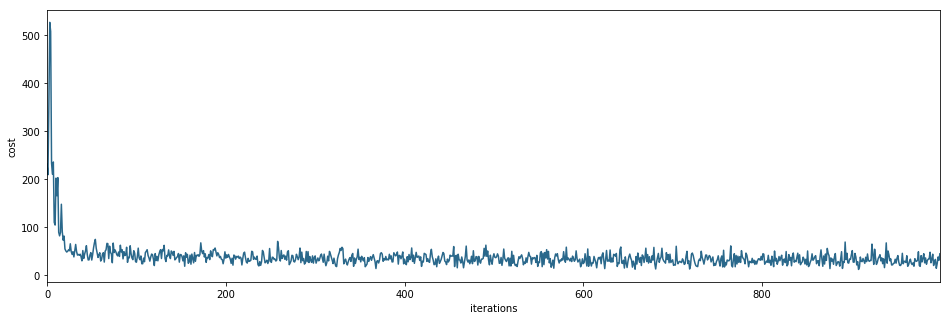

('Train Accuracy:', 0.9199091)
('Test Accuracy:', 0.9174)


In [42]:
def plotCost(itrs, costs):
    plt.figure(figsize=(16,5))
    plt.plot(np.squeeze(costs), color='#2A688B')
    plt.xlim(0, itrs-1)
    plt.ylabel("cost")
    plt.xlabel("iterations")
    plt.show()
    
def train(debug):
    costs = []
    itrs = 1000
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)
        
        for i in range(itrs):
            batch_xs, batch_ys = data.train.next_batch(100)
            
            _, batch_cost = session.run([optimizer, cross_entropy], feed_dict={x: batch_xs, y: batch_ys})
            costs.append(batch_cost)
            
            if debug:
                print("Cost after batch {batch}: {cost}".format(batch=i, cost=batch_cost))
        

        plotCost(itrs, costs)
        
        print("Train Accuracy:", session.run(accuracy, feed_dict={x: data.train.images, y: data.train.labels}))
        print("Test Accuracy:", session.run(accuracy, feed_dict={x: data.test.images, y: data.test.labels}))

train(False)
